In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("dataset_folder/train.csv")
test = pd.read_csv("dataset_folder/test.csv")

df_train = train.copy()
df_test = test.copy()

df_train.drop(columns = "Id",inplace=True)

df_test.drop(columns = "Id",inplace=True)


price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

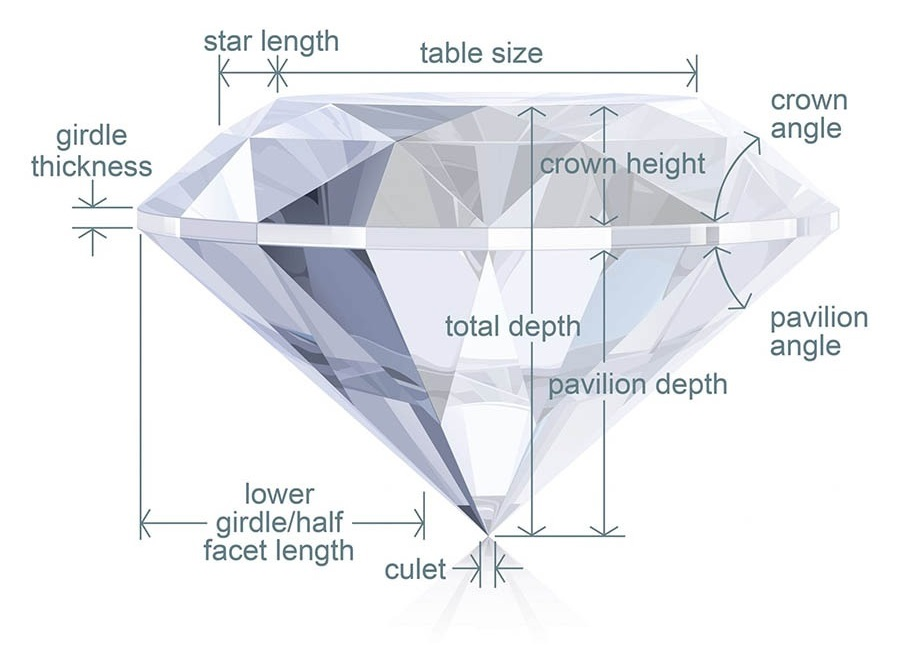


In [3]:
df_train.rename(columns={'x': 'length', 'y': 'width', 'depth': 'depth_percentage', 'z':'depth','table':'table_width'}, inplace=True)
df_test.rename(columns={'x': 'length', 'y': 'width', 'depth': 'depth_percentage', 'z':'depth','table':'table_width'}, inplace=True)


df_train

,carat,cut,color,clarity,depth_percentage,table_width,price,length,width,depth
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...
43147,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65


In [4]:
df_test

,carat,cut,color,clarity,depth_percentage,table_width,length,width,depth
0,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92
...,...,...,...,...,...,...,...,...,...
10783,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26
10784,1.05,Ideal,G,VS2,60.8,57.0,6.65,6.58,4.02
10785,0.71,Ideal,E,VVS1,62.3,55.0,5.68,5.72,3.55
10786,1.11,Premium,E,SI2,61.0,60.0,6.68,6.66,4.07


In [5]:
from sklearn.preprocessing import OrdinalEncoder

cut_rank_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_rank_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_rank_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

ordinal_encoder = OrdinalEncoder(categories=[cut_rank_order, color_rank_order, clarity_rank_order])

cat_cols = ['cut', 'color', 'clarity']







encoded_cols = ordinal_encoder.fit_transform(df_train[cat_cols])

encoded_df = pd.DataFrame(encoded_cols, columns=['cut_ordinal', 'color_ordinal', 'clarity_ordinal'])

df_train = pd.concat([df_train, encoded_df], axis=1)

df_train



,carat,cut,color,clarity,depth_percentage,table_width,price,length,width,depth,cut_ordinal,color_ordinal,clarity_ordinal
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,4.0,1.0,1.0
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,3.0,3.0,5.0
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,4.0,4.0,3.0
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,4.0,3.0,3.0
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,3.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43147,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18,4.0,5.0,3.0
43148,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55,2.0,6.0,3.0
43149,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02,3.0,1.0,6.0
43150,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65,3.0,5.0,4.0


In [6]:



encoded_cols = ordinal_encoder.transform(df_test[cat_cols])

encoded_df = pd.DataFrame(encoded_cols, columns=['cut_ordinal', 'color_ordinal', 'clarity_ordinal'])

df_test = pd.concat([df_test, encoded_df], axis=1)




In [7]:
import numpy as np

def replace_outliers_with_nans(df, outliers_cols):

    clean_df = df.copy()  # Create a copy of the input DataFrame
    
    for col in outliers_cols:
        data = clean_df[col]
        
        Q1 = data.quantile(0.10)
        Q3 = data.quantile(0.90)
        IQR = Q3 - Q1

        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        outliers = ((data < lower_bound) | (data > upper_bound))
        clean_df.loc[outliers, col] = np.nan

    return clean_df

outliers_cols = ['width','depth',"length",'table_width','depth_percentage']

df_train = replace_outliers_with_nans(df_train.copy(),outliers_cols)
df_test = replace_outliers_with_nans(df_test.copy(),outliers_cols)

In [12]:
df_train.isna().sum()


carat                0
cut                  0
color                0
clarity              0
depth_percentage    84
table_width         36
price                0
length               0
width                2
depth                2
cut_ordinal          0
color_ordinal        0
clarity_ordinal      0
dtype: int64

In [9]:
df_test.isna().sum()

carat                0
cut                  0
color                0
clarity              0
depth_percentage    20
table_width         13
length               0
width                0
depth                0
cut_ordinal          0
color_ordinal        0
clarity_ordinal      0
dtype: int64

In [11]:
df_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth_percentage', 'table_width',
       'price', 'length', 'width', 'depth', 'cut_ordinal', 'color_ordinal',
       'clarity_ordinal'],
      dtype='object')

In [13]:
df_train = pd.get_dummies(df_train).drop(columns = "price")
df_test = pd.get_dummies(df_test)

In [14]:
df_train

,carat,depth_percentage,table_width,length,width,depth,cut_ordinal,color_ordinal,clarity_ordinal,cut_Fair,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.06,61.8,57.0,6.57,6.60,4.07,4.0,1.0,1.0,False,...,True,False,False,False,False,True,False,False,False,False
1,1.51,60.9,58.0,7.38,7.42,4.51,3.0,3.0,5.0,False,...,False,False,False,False,False,False,False,False,False,True
2,0.32,61.3,56.0,4.43,4.41,2.71,4.0,4.0,3.0,False,...,False,False,False,False,False,False,False,True,False,False
3,0.53,61.2,56.0,5.19,5.22,3.19,4.0,3.0,3.0,False,...,False,False,False,False,False,False,False,True,False,False
4,0.70,61.0,57.0,5.76,5.72,3.50,3.0,2.0,5.0,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43147,0.52,61.5,56.0,5.16,5.18,3.18,4.0,5.0,3.0,False,...,False,False,False,False,False,False,False,True,False,False
43148,0.72,62.1,59.0,5.70,5.73,3.55,2.0,6.0,3.0,False,...,False,False,False,False,False,False,False,True,False,False
43149,0.44,61.5,58.0,4.95,4.87,3.02,3.0,1.0,6.0,False,...,True,False,False,False,False,False,False,False,True,False
43150,0.31,60.2,58.0,4.38,4.43,2.65,3.0,5.0,4.0,False,...,False,False,False,False,False,False,True,False,False,False


In [15]:
df_train.columns

Index(['carat', 'depth_percentage', 'table_width', 'length', 'width', 'depth',
       'cut_ordinal', 'color_ordinal', 'clarity_ordinal', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()



df_train = pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns)
df_test = pd.DataFrame(imputer.transform(df_test), columns=df_test.columns)

In [17]:
df_test.isna().sum()

carat               0
depth_percentage    0
table_width         0
length              0
width               0
depth               0
cut_ordinal         0
color_ordinal       0
clarity_ordinal     0
cut_Fair            0
cut_Good            0
cut_Ideal           0
cut_Premium         0
cut_Very Good       0
color_D             0
color_E             0
color_F             0
color_G             0
color_H             0
color_I             0
color_J             0
clarity_I1          0
clarity_IF          0
clarity_SI1         0
clarity_SI2         0
clarity_VS1         0
clarity_VS2         0
clarity_VVS1        0
clarity_VVS2        0
dtype: int64

In [18]:
df_train.isna().sum()


carat               0
depth_percentage    0
table_width         0
length              0
width               0
depth               0
cut_ordinal         0
color_ordinal       0
clarity_ordinal     0
cut_Fair            0
cut_Good            0
cut_Ideal           0
cut_Premium         0
cut_Very Good       0
color_D             0
color_E             0
color_F             0
color_G             0
color_H             0
color_I             0
color_J             0
clarity_I1          0
clarity_IF          0
clarity_SI1         0
clarity_SI2         0
clarity_VS1         0
clarity_VS2         0
clarity_VVS1        0
clarity_VVS2        0
dtype: int64

In [20]:
# Count zero values in each column
add_one_col = ["carat",'depth_percentage', 'table_width', 'length', 'width', 'depth']
zero_counts = (df_train[add_one_col] == 0).sum()
print("Zero values in each column df_train:\n", zero_counts)

Zero values in each column df_train:
 carat                0
depth_percentage     0
table_width          0
length               5
width                4
depth               17
dtype: int64


In [21]:
# Count zero values in each column
add_one_col = ["carat",'depth_percentage', 'table_width', 'length', 'width', 'depth']
zero_counts = (df_test[add_one_col] == 0).sum()
print("Zero values in each column df_train:\n", zero_counts)

Zero values in each column df_train:
 carat               0
depth_percentage    0
table_width         0
length              3
width               3
depth               3
dtype: int64


In [22]:
add_one_col = ["carat",'depth_percentage', 'table_width',
       'length', 'width', 'depth']
df_train[add_one_col] = df_train[add_one_col].add(1, fill_value=0)
df_test[add_one_col] = df_test[add_one_col].add(1, fill_value=0)

In [43]:
import pandas as pd

def generate_additional_features(df):

    # Calculate volume
    df['volume'] = df['length'] * df['width'] * df['depth']

    # Calculate density
    df['density'] = df['carat'] / df['volume']

    # Calculate length-width ratio
    df['length_width_ratio'] = df['length'] / df['width']

    # Calculate depth percentage
    df['depth_percentage'] = 2 * df['depth'] / (df['length'] + df['width'])

    # Calculate volume density
    df['volume_density'] = df['carat'] / (df['length'] * df['width'] * df['depth'])

    # Calculate table area
    df['table_area'] = df['width'] * df['depth']

    # Calculate length-depth ratio
    df['length_depth_ratio'] = df['length'] / df['depth']

    # Calculate width-depth ratio
    df['width_depth_ratio'] = df['width'] / df['depth']
    
    # Calculate category_sum
    df['category_sum'] = df['cut_ordinal'] + df['color_ordinal'] + df['clarity_ordinal']
    
    # Calculate carat_depth_prec
    df["carat_depth_prec"] = df["carat"] + df["depth_percentage"]
    
    # Calculate carat_table_width
    df["carat_table_width"] = df["carat"] + df["table_width"]
    
    # Calculate depth_percentage_sum_table_width
    df["depth_percentage_sum_table_width"] = df["depth_percentage"] + df["table_width"]

    return df


df_train_ge = generate_additional_features(df_train.copy())
df_test_ge = generate_additional_features(df_test.copy())


In [24]:
df_train_ge

,carat,depth_percentage,table_width,length,width,depth,cut_ordinal,color_ordinal,clarity_ordinal,cut_Fair,...,density,length_width_ratio,volume_density,table_area,length_depth_ratio,width_depth_ratio,category_sum,carat_depth_prec,carat_table_width,depth_percentage_sum_table_width
0,2.06,0.668425,58.0,7.57,7.60,5.07,4.0,1.0,1.0,0.0,...,0.007062,0.996053,0.007062,38.5320,1.493097,1.499014,6.0,2.728425,60.06,58.668425
1,2.51,0.655952,59.0,8.38,8.42,5.51,3.0,3.0,5.0,0.0,...,0.006456,0.995249,0.006456,46.3942,1.520871,1.528131,11.0,3.165952,61.51,59.655952
2,1.32,0.684502,57.0,5.43,5.41,3.71,4.0,4.0,3.0,0.0,...,0.012112,1.003697,0.012112,20.0711,1.463612,1.458221,11.0,2.004502,58.32,57.684502
3,1.53,0.675262,57.0,6.19,6.22,4.19,4.0,3.0,3.0,0.0,...,0.009484,0.995177,0.009484,26.0618,1.477327,1.484487,10.0,2.205262,58.53,57.675262
4,1.70,0.667656,58.0,6.76,6.72,4.50,3.0,2.0,5.0,0.0,...,0.008316,1.005952,0.008316,30.2400,1.502222,1.493333,10.0,2.367656,59.70,58.667656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43147,1.52,0.677472,57.0,6.16,6.18,4.18,4.0,5.0,3.0,0.0,...,0.009552,0.996764,0.009552,25.8324,1.473684,1.478469,12.0,2.197472,58.52,57.677472
43148,1.72,0.677587,60.0,6.70,6.73,4.55,2.0,6.0,3.0,0.0,...,0.008384,0.995542,0.008384,30.6215,1.472527,1.479121,11.0,2.397587,61.72,60.677587
43149,1.44,0.680203,59.0,5.95,5.87,4.02,3.0,1.0,6.0,0.0,...,0.010256,1.013629,0.010256,23.5974,1.480100,1.460199,10.0,2.120203,60.44,59.680203
43150,1.31,0.675301,59.0,5.38,5.43,3.65,3.0,5.0,4.0,0.0,...,0.012286,0.990792,0.012286,19.8195,1.473973,1.487671,12.0,1.985301,60.31,59.675301


In [25]:
df_test_ge

,carat,depth_percentage,table_width,length,width,depth,cut_ordinal,color_ordinal,clarity_ordinal,cut_Fair,...,density,length_width_ratio,volume_density,table_area,length_depth_ratio,width_depth_ratio,category_sum,carat_depth_prec,carat_table_width,depth_percentage_sum_table_width
0,1.34,0.681818,58.0,5.52,5.48,3.75,4.0,3.0,5.0,0.0,...,0.011813,1.007299,0.011813,20.5500,1.472000,1.461333,12.0,2.021818,59.34,58.681818
1,1.71,0.682563,59.0,6.74,6.68,4.58,3.0,5.0,3.0,0.0,...,0.008293,1.008982,0.008293,30.5944,1.471616,1.458515,11.0,2.392563,60.71,59.682563
2,1.44,0.691716,57.0,5.83,5.88,4.05,2.0,1.0,4.0,0.0,...,0.010372,0.991497,0.010372,23.8140,1.439506,1.451852,7.0,2.131716,58.44,57.691716
3,1.81,0.658640,60.0,7.09,7.03,4.65,3.0,5.0,1.0,0.0,...,0.007810,1.008535,0.007810,32.6895,1.524731,1.511828,9.0,2.468640,61.81,60.658640
4,1.40,0.679376,57.0,5.74,5.80,3.92,4.0,3.0,6.0,0.0,...,0.010728,0.989655,0.010728,22.7360,1.464286,1.479592,13.0,2.079376,58.40,57.679376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,1.57,0.670866,57.0,6.34,6.36,4.26,4.0,2.0,4.0,0.0,...,0.009140,0.996855,0.009140,27.0936,1.488263,1.492958,10.0,2.240866,58.57,57.670866
10784,2.05,0.659225,58.0,7.65,7.58,5.02,4.0,3.0,3.0,0.0,...,0.007042,1.009235,0.007042,38.0516,1.523904,1.509960,10.0,2.709225,60.05,58.659225
10785,1.71,0.679104,56.0,6.68,6.72,4.55,4.0,5.0,6.0,0.0,...,0.008372,0.994048,0.008372,30.5760,1.468132,1.476923,15.0,2.389104,57.71,56.679104
10786,2.11,0.661017,61.0,7.68,7.66,5.07,3.0,5.0,1.0,0.0,...,0.007074,1.002611,0.007074,38.8362,1.514793,1.510848,9.0,2.771017,63.11,61.661017


In [26]:
df_train

,carat,depth_percentage,table_width,length,width,depth,cut_ordinal,color_ordinal,clarity_ordinal,cut_Fair,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,2.06,62.8,58.0,7.57,7.60,5.07,4.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.51,61.9,59.0,8.38,8.42,5.51,3.0,3.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.32,62.3,57.0,5.43,5.41,3.71,4.0,4.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.53,62.2,57.0,6.19,6.22,4.19,4.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.70,62.0,58.0,6.76,6.72,4.50,3.0,2.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43147,1.52,62.5,57.0,6.16,6.18,4.18,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43148,1.72,63.1,60.0,6.70,6.73,4.55,2.0,6.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43149,1.44,62.5,59.0,5.95,5.87,4.02,3.0,1.0,6.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43150,1.31,61.2,59.0,5.38,5.43,3.65,3.0,5.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [27]:
train

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,43151,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65


In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
df_train_ge["cluster"] = kmeans.fit_predict(df_train_ge)
df_test_ge["cluster"] = kmeans.predict(df_test_ge)

In [29]:
df_train_ge["price"] = train["price"]
df_train_ge

,carat,depth_percentage,table_width,length,width,depth,cut_ordinal,color_ordinal,clarity_ordinal,cut_Fair,...,volume_density,table_area,length_depth_ratio,width_depth_ratio,category_sum,carat_depth_prec,carat_table_width,depth_percentage_sum_table_width,cluster,price
0,2.06,0.668425,58.0,7.57,7.60,5.07,4.0,1.0,1.0,0.0,...,0.007062,38.5320,1.493097,1.499014,6.0,2.728425,60.06,58.668425,1,4270
1,2.51,0.655952,59.0,8.38,8.42,5.51,3.0,3.0,5.0,0.0,...,0.006456,46.3942,1.520871,1.528131,11.0,3.165952,61.51,59.655952,1,15164
2,1.32,0.684502,57.0,5.43,5.41,3.71,4.0,4.0,3.0,0.0,...,0.012112,20.0711,1.463612,1.458221,11.0,2.004502,58.32,57.684502,0,828
3,1.53,0.675262,57.0,6.19,6.22,4.19,4.0,3.0,3.0,0.0,...,0.009484,26.0618,1.477327,1.484487,10.0,2.205262,58.53,57.675262,0,1577
4,1.70,0.667656,58.0,6.76,6.72,4.50,3.0,2.0,5.0,0.0,...,0.008316,30.2400,1.502222,1.493333,10.0,2.367656,59.70,58.667656,0,2596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43147,1.52,0.677472,57.0,6.16,6.18,4.18,4.0,5.0,3.0,0.0,...,0.009552,25.8324,1.473684,1.478469,12.0,2.197472,58.52,57.677472,0,1760
43148,1.72,0.677587,60.0,6.70,6.73,4.55,2.0,6.0,3.0,0.0,...,0.008384,30.6215,1.472527,1.479121,11.0,2.397587,61.72,60.677587,0,3016
43149,1.44,0.680203,59.0,5.95,5.87,4.02,3.0,1.0,6.0,0.0,...,0.010256,23.5974,1.480100,1.460199,10.0,2.120203,60.44,59.680203,0,990
43150,1.31,0.675301,59.0,5.38,5.43,3.65,3.0,5.0,4.0,0.0,...,0.012286,19.8195,1.473973,1.487671,12.0,1.985301,60.31,59.675301,0,734


In [31]:
df_train_ge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   carat                             43152 non-null  float64
 1   depth_percentage                  43152 non-null  float64
 2   table_width                       43152 non-null  float64
 3   length                            43152 non-null  float64
 4   width                             43152 non-null  float64
 5   depth                             43152 non-null  float64
 6   cut_ordinal                       43152 non-null  float64
 7   color_ordinal                     43152 non-null  float64
 8   clarity_ordinal                   43152 non-null  float64
 9   cut_Fair                          43152 non-null  float64
 10  cut_Good                          43152 non-null  float64
 11  cut_Ideal                         43152 non-null  float64
 12  cut_

<Axes: >

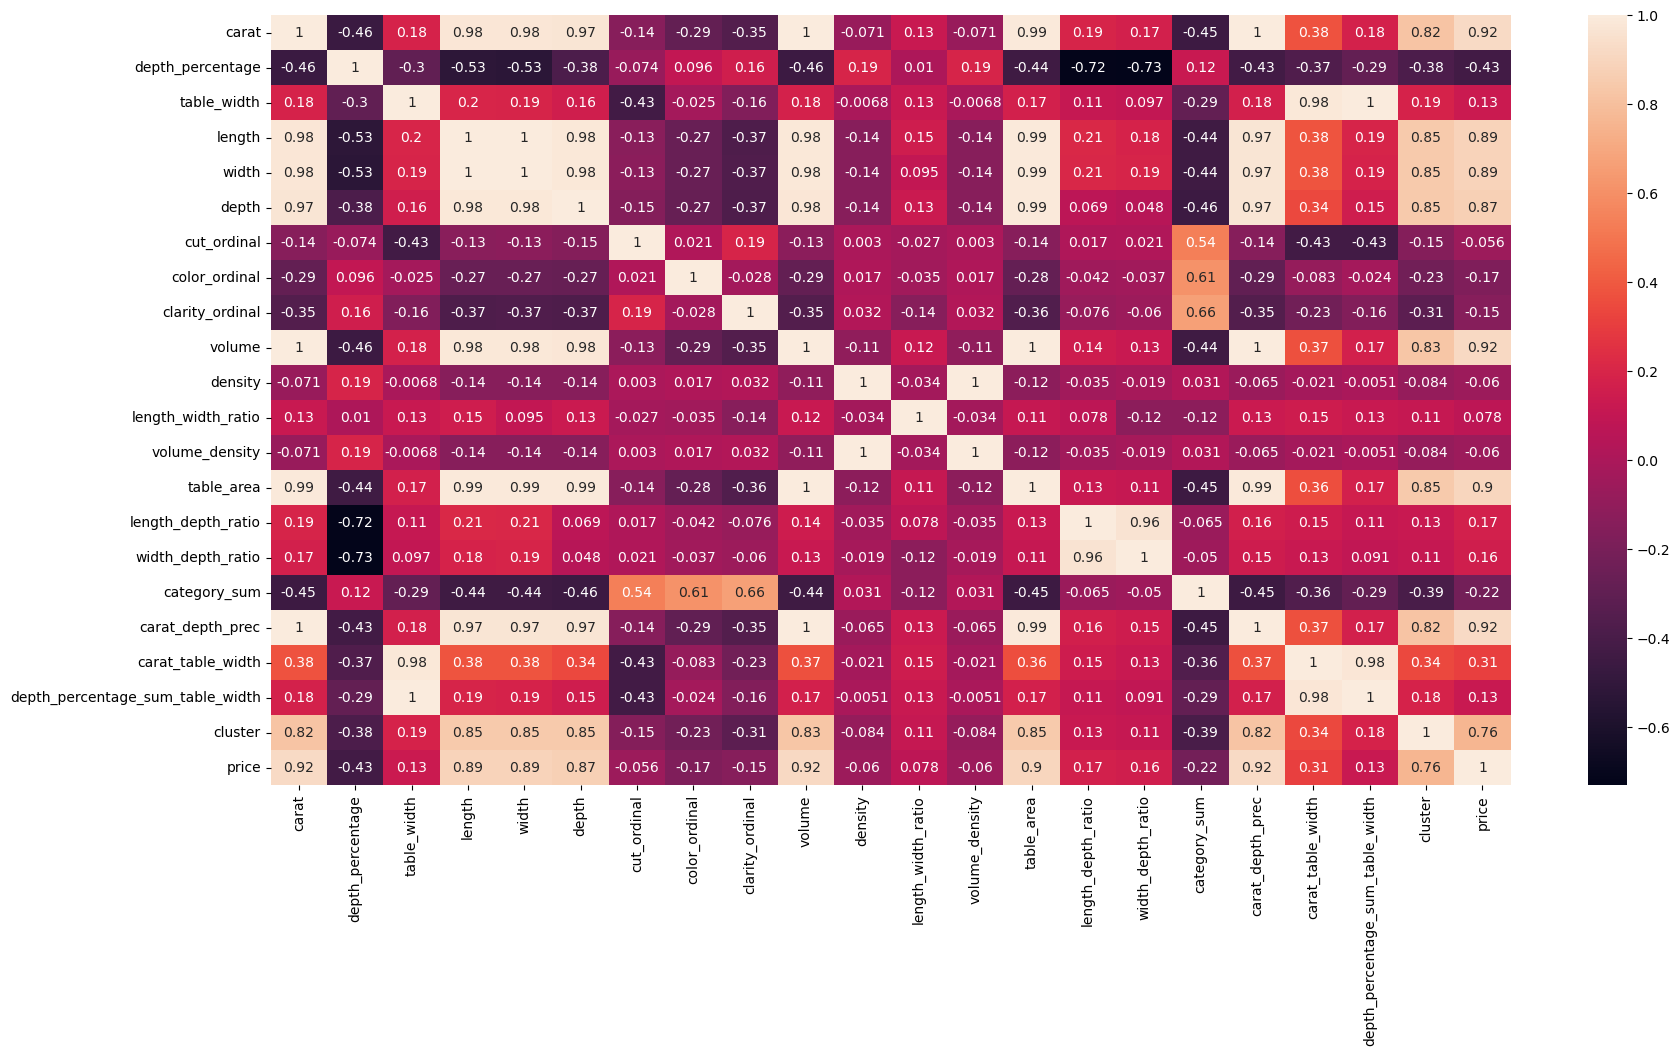

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train_ge.drop(columns = ['cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2']).select_dtypes("number").corr(),annot=True)

In [32]:
df_train_ge

,carat,depth_percentage,table_width,length,width,depth,cut_ordinal,color_ordinal,clarity_ordinal,cut_Fair,...,volume_density,table_area,length_depth_ratio,width_depth_ratio,category_sum,carat_depth_prec,carat_table_width,depth_percentage_sum_table_width,cluster,price
0,2.06,0.668425,58.0,7.57,7.60,5.07,4.0,1.0,1.0,0.0,...,0.007062,38.5320,1.493097,1.499014,6.0,2.728425,60.06,58.668425,1,4270
1,2.51,0.655952,59.0,8.38,8.42,5.51,3.0,3.0,5.0,0.0,...,0.006456,46.3942,1.520871,1.528131,11.0,3.165952,61.51,59.655952,1,15164
2,1.32,0.684502,57.0,5.43,5.41,3.71,4.0,4.0,3.0,0.0,...,0.012112,20.0711,1.463612,1.458221,11.0,2.004502,58.32,57.684502,0,828
3,1.53,0.675262,57.0,6.19,6.22,4.19,4.0,3.0,3.0,0.0,...,0.009484,26.0618,1.477327,1.484487,10.0,2.205262,58.53,57.675262,0,1577
4,1.70,0.667656,58.0,6.76,6.72,4.50,3.0,2.0,5.0,0.0,...,0.008316,30.2400,1.502222,1.493333,10.0,2.367656,59.70,58.667656,0,2596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43147,1.52,0.677472,57.0,6.16,6.18,4.18,4.0,5.0,3.0,0.0,...,0.009552,25.8324,1.473684,1.478469,12.0,2.197472,58.52,57.677472,0,1760
43148,1.72,0.677587,60.0,6.70,6.73,4.55,2.0,6.0,3.0,0.0,...,0.008384,30.6215,1.472527,1.479121,11.0,2.397587,61.72,60.677587,0,3016
43149,1.44,0.680203,59.0,5.95,5.87,4.02,3.0,1.0,6.0,0.0,...,0.010256,23.5974,1.480100,1.460199,10.0,2.120203,60.44,59.680203,0,990
43150,1.31,0.675301,59.0,5.38,5.43,3.65,3.0,5.0,4.0,0.0,...,0.012286,19.8195,1.473973,1.487671,12.0,1.985301,60.31,59.675301,0,734


In [33]:
df_test_ge

,carat,depth_percentage,table_width,length,width,depth,cut_ordinal,color_ordinal,clarity_ordinal,cut_Fair,...,length_width_ratio,volume_density,table_area,length_depth_ratio,width_depth_ratio,category_sum,carat_depth_prec,carat_table_width,depth_percentage_sum_table_width,cluster
0,1.34,0.681818,58.0,5.52,5.48,3.75,4.0,3.0,5.0,0.0,...,1.007299,0.011813,20.5500,1.472000,1.461333,12.0,2.021818,59.34,58.681818,0
1,1.71,0.682563,59.0,6.74,6.68,4.58,3.0,5.0,3.0,0.0,...,1.008982,0.008293,30.5944,1.471616,1.458515,11.0,2.392563,60.71,59.682563,0
2,1.44,0.691716,57.0,5.83,5.88,4.05,2.0,1.0,4.0,0.0,...,0.991497,0.010372,23.8140,1.439506,1.451852,7.0,2.131716,58.44,57.691716,0
3,1.81,0.658640,60.0,7.09,7.03,4.65,3.0,5.0,1.0,0.0,...,1.008535,0.007810,32.6895,1.524731,1.511828,9.0,2.468640,61.81,60.658640,0
4,1.40,0.679376,57.0,5.74,5.80,3.92,4.0,3.0,6.0,0.0,...,0.989655,0.010728,22.7360,1.464286,1.479592,13.0,2.079376,58.40,57.679376,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,1.57,0.670866,57.0,6.34,6.36,4.26,4.0,2.0,4.0,0.0,...,0.996855,0.009140,27.0936,1.488263,1.492958,10.0,2.240866,58.57,57.670866,0
10784,2.05,0.659225,58.0,7.65,7.58,5.02,4.0,3.0,3.0,0.0,...,1.009235,0.007042,38.0516,1.523904,1.509960,10.0,2.709225,60.05,58.659225,1
10785,1.71,0.679104,56.0,6.68,6.72,4.55,4.0,5.0,6.0,0.0,...,0.994048,0.008372,30.5760,1.468132,1.476923,15.0,2.389104,57.71,56.679104,0
10786,2.11,0.661017,61.0,7.68,7.66,5.07,3.0,5.0,1.0,0.0,...,1.002611,0.007074,38.8362,1.514793,1.510848,9.0,2.771017,63.11,61.661017,1


In [34]:
X = df_train_ge.drop("price",axis = 1)
y = df_train_ge["price"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)


In [35]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score

cat = CatBoostRegressor()

cat.fit(X_train,y_train)

y_pred = cat.predict(X_test)

Learning rate set to 0.071647
0:	learn: 3731.0702954	total: 49.4ms	remaining: 49.3s
1:	learn: 3498.9457567	total: 51.5ms	remaining: 25.7s
2:	learn: 3285.1279764	total: 53.7ms	remaining: 17.8s
3:	learn: 3088.8743970	total: 55.8ms	remaining: 13.9s
4:	learn: 2900.5528183	total: 57.8ms	remaining: 11.5s
5:	learn: 2730.9482970	total: 59.6ms	remaining: 9.87s
6:	learn: 2564.8856240	total: 61.5ms	remaining: 8.73s
7:	learn: 2419.5570682	total: 63.6ms	remaining: 7.88s
8:	learn: 2284.8078823	total: 65.4ms	remaining: 7.2s
9:	learn: 2160.3059993	total: 67.2ms	remaining: 6.66s
10:	learn: 2042.9876345	total: 69.1ms	remaining: 6.22s
11:	learn: 1935.0997735	total: 70.9ms	remaining: 5.84s
12:	learn: 1830.1222471	total: 72.9ms	remaining: 5.54s
13:	learn: 1735.4288220	total: 75.2ms	remaining: 5.3s
14:	learn: 1647.1791918	total: 77.2ms	remaining: 5.07s
15:	learn: 1566.3736252	total: 79.4ms	remaining: 4.88s
16:	learn: 1491.8122014	total: 81.2ms	remaining: 4.7s
17:	learn: 1422.8792684	total: 83.2ms	remaining:

In [36]:
np.sqrt(mean_squared_error(y_test,y_pred))

542.5038822610384

In [37]:
y_pred = cat.predict(X_train)
print(r2_score(y_train, y_pred), np.sqrt(mean_squared_error(y_train, y_pred)))
y_pred = cat.predict(X_test)
print(r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)))

0.9908411854838477 381.15207551093823
0.9815737669448555 542.5038822610384


In [38]:
import numpy as np
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


catboost_reg = CatBoostRegressor()
lgbm_reg = LGBMRegressor()
xgb_reg = XGBRegressor()
rf_reg = RandomForestRegressor()
gb_reg = GradientBoostingRegressor()

meta_reg = LinearRegression()

stacked_reg = StackingRegressor(
    estimators=[
        ('catboost', catboost_reg),
        ('lgbm', lgbm_reg),
        ('xgb', xgb_reg),
        ('rf', rf_reg),
        ('gb', gb_reg)
    ],
    final_estimator=meta_reg,
    cv=5  
)

stacked_reg.fit(X_train, y_train)

y_pred = stacked_reg.predict(X_test)
print("Stacked Regressor R^2 Score:", np.sqrt(mean_squared_error(y_test,y_pred)))


Learning rate set to 0.071647
0:	learn: 3731.0702954	total: 2.73ms	remaining: 2.73s
1:	learn: 3498.9457567	total: 5.29ms	remaining: 2.64s
2:	learn: 3285.1279764	total: 7.52ms	remaining: 2.5s
3:	learn: 3088.8743970	total: 9.52ms	remaining: 2.37s
4:	learn: 2900.5528183	total: 11.5ms	remaining: 2.3s
5:	learn: 2730.9482970	total: 14.7ms	remaining: 2.43s
6:	learn: 2564.8856240	total: 16.8ms	remaining: 2.39s
7:	learn: 2419.5570682	total: 19.1ms	remaining: 2.37s
8:	learn: 2284.8078823	total: 21ms	remaining: 2.31s
9:	learn: 2160.3059993	total: 22.9ms	remaining: 2.27s
10:	learn: 2042.9876345	total: 25ms	remaining: 2.25s
11:	learn: 1935.0997735	total: 27ms	remaining: 2.22s
12:	learn: 1830.1222471	total: 28.9ms	remaining: 2.19s
13:	learn: 1735.4288220	total: 30.8ms	remaining: 2.17s
14:	learn: 1647.1791918	total: 32.8ms	remaining: 2.15s
15:	learn: 1566.3736252	total: 34.7ms	remaining: 2.14s
16:	learn: 1491.8122014	total: 36.5ms	remaining: 2.11s
17:	learn: 1422.8792684	total: 38.3ms	remaining: 2.09

In [39]:
y_pred = stacked_reg.predict(X_train)
print(r2_score(y_train, y_pred), np.sqrt(mean_squared_error(y_train, y_pred)))
y_pred = stacked_reg.predict(X_test)
print(r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)))

0.9924785058613667 345.40666842478953
0.9821230000829659 534.3574756987016


In [40]:
stacked_reg.fit(X,y)

Learning rate set to 0.074218
0:	learn: 3723.0839523	total: 3.08ms	remaining: 3.08s
1:	learn: 3486.3710781	total: 6.07ms	remaining: 3.03s
2:	learn: 3264.1513494	total: 8.71ms	remaining: 2.89s
3:	learn: 3062.0251483	total: 11.6ms	remaining: 2.88s
4:	learn: 2870.9156728	total: 14.2ms	remaining: 2.82s
5:	learn: 2691.4958335	total: 16.9ms	remaining: 2.8s
6:	learn: 2525.8028608	total: 20ms	remaining: 2.83s
7:	learn: 2372.3282607	total: 22.5ms	remaining: 2.79s
8:	learn: 2233.7913117	total: 25.2ms	remaining: 2.78s
9:	learn: 2105.6319471	total: 27.7ms	remaining: 2.74s
10:	learn: 1986.4189198	total: 30.5ms	remaining: 2.75s
11:	learn: 1874.7302690	total: 33.5ms	remaining: 2.76s
12:	learn: 1772.5511484	total: 36.7ms	remaining: 2.78s
13:	learn: 1677.3532168	total: 39.6ms	remaining: 2.79s
14:	learn: 1589.5672955	total: 42.4ms	remaining: 2.78s
15:	learn: 1509.6046789	total: 44.7ms	remaining: 2.75s
16:	learn: 1435.8220649	total: 47ms	remaining: 2.72s
17:	learn: 1367.8103833	total: 49.4ms	remaining: 2

StackingRegressor(cv=5,
                  estimators=[('catboost',
                               <catboost.core.CatBoostRegressor object at 0x7b3d54d51c00>),
                              ('lgbm', LGBMRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_t...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('rf', RandomForestRegressor()),
                              ('gb', GradientBoostingRegressor())],
                  final_estimator=LinearRegression())

In [41]:
final_pred = stacked_reg.predict(df_test_ge)

In [42]:
sub = {
    "id" : test["Id"],
    "price":final_pred

}

pd.DataFrame(sub).to_csv("sub_new_1.csv",index=False)